<center>

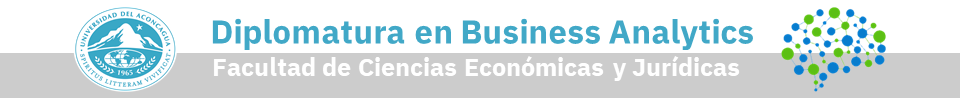

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final - Módulo 7 - Introducción a Python y Pandas

</font>
</center>

~~~
Pablo Ariel Genro
~~~

# Activar módulos necesarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

# Obtener datos

In [2]:
datos_url = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_07_Introduccion_a_Python/Analisis_de_Facturas_de_Venta.csv"

# Crear un DataFrame

In [3]:
facturas = pd.read_csv(datos_url)

## Visualizaciones del DataFrame

In [4]:
facturas

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,31/1/18,Factura,Dise–o Web,5.0,6300.0000,31500.00,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Impresora Multifuncion,8.0,3553.7190,28429.75,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,1/1/18,Factura,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos


## Información del DataFrame y de los datos

In [5]:
facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DOCUMENTO              159 non-null    object 
 1   ORGANIZACION           159 non-null    object 
 2   FECHA                  159 non-null    object 
 3   TIPOFACTURA            159 non-null    object 
 4   PRODUCTO               159 non-null    object 
 5   CANTIDAD               159 non-null    float64
 6   PRECIO                 159 non-null    float64
 7   IMPORTEMONTRANSACCION  159 non-null    float64
 8   MONEDA                 159 non-null    object 
dtypes: float64(3), object(6)
memory usage: 11.3+ KB


+ *Revisar si columnas con valores únicos (principalmente MONEDA y TIPOFACTURA ya que en el resumen del DataFrame no se aprecia)*

In [6]:
facturas.nunique()

DOCUMENTO                138
ORGANIZACION              20
FECHA                    127
TIPOFACTURA                1
PRODUCTO                  23
CANTIDAD                  23
PRECIO                   125
IMPORTEMONTRANSACCION    134
MONEDA                     2
dtype: int64

+ *Para concer más sobre el contenido de Moneda y ver que impacto tiene en la estructura del set de datos*

In [7]:
facturas.groupby("MONEDA").count()
#Con esto veo rápido las 2 monedas y las operaciones en las que participan

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION
MONEDA,,,,,,,,
Dólares,2,2,2,2,2,2,2,2
Pesos Argentinos,157,157,157,157,157,157,157,157


In [8]:
facturas.query("MONEDA== 'Dólares'")
#Identifico las 2 operaciones en Dólares

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
81,A-0001-00000173,Klarkson,22/10/18,Factura,Publicidad y Marketing,1.0,2000.0,2000.0,Dólares
131,A-0001-00000143,Horizonte S.A.,18/5/18,Factura,PC,4.0,600.0,2400.0,Dólares


# Trabajando con el DataFrame

## Eliminando datos no disponibles y duplicados

+ La columna *TIPOFACTURA* no informa sobre el el tipo de factura. Ese dato está junto con el número del documento. Lo extraigo de ahí y reemplazo("elimino") el contenido, en lugar de eliminar la columna:

In [9]:
facturas["TIPOFACTURA"] = facturas.DOCUMENTO.str[0]
facturas.head()

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,B,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,B,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,A,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,A,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,A,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos


+ Adicionalmente, redondeo el importe en 2 decimales *PRECIO* para que visualmente quede mejor:

In [10]:
facturas["PRECIO"] = facturas.PRECIO.round(2)
facturas.head()

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,B,Consultoria Web,50.0,5785.12,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,B,Honorarios,1.0,99586.78,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,A,Parlantes para PC,30.0,1990.00,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,A,Mercaderia de Reventa,30.0,10358.00,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,A,Consultoria Web,50.0,6300.00,315000.00,Pesos Argentinos


In [11]:
len(facturas[facturas.PRECIO!= 0]) #En precio no hay valores 0

159

In [12]:
len(facturas[facturas.IMPORTEMONTRANSACCION!= 0]) #En importe total no hay valores 0

159

In [13]:
len(facturas[facturas.CANTIDAD!= 0]) #En importe total no hay valores 0

159

In [14]:
facturas.dropna(how="any", inplace=True)
facturas.shape
#No han habido cambios

(159, 9)

In [15]:
facturas.drop_duplicates()
facturas.shape
#No han habido cambios

(159, 9)

## Insertando columnas

+ Primero cambio el tipo de dato de la columna *FECHA* y luego uso ese dato para extraer el nombre del mes y numero de año. También cambio el tipo de dato en la cantidad.

In [16]:
facturas["FECHA"] = pd.to_datetime(facturas.FECHA)
facturas["CANTIDAD"] = facturas.CANTIDAD.astype("int32")

In [17]:
facturas.insert(3,column="MES",value=pd.DatetimeIndex(facturas["FECHA"]).month_name())
facturas.insert(4,column="AÑO",value=facturas["FECHA"].dt.year)
facturas["AÑO"] = facturas.AÑO.astype("object") #Año como objeto para poder usarlo en gráficos
facturas.head()

,DOCUMENTO,ORGANIZACION,FECHA,MES,AÑO,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,2019-12-27,December,2019,B,Consultoria Web,50,5785.12,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,December,2019,B,Honorarios,1,99586.78,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,2019-10-12,October,2019,A,Parlantes para PC,30,1990.00,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,June,2019,A,Mercaderia de Reventa,30,10358.00,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,November,2019,A,Consultoria Web,50,6300.00,315000.00,Pesos Argentinos


In [18]:
facturas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DOCUMENTO              159 non-null    object        
 1   ORGANIZACION           159 non-null    object        
 2   FECHA                  159 non-null    datetime64[ns]
 3   MES                    159 non-null    object        
 4   AÑO                    159 non-null    object        
 5   TIPOFACTURA            159 non-null    object        
 6   PRODUCTO               159 non-null    object        
 7   CANTIDAD               159 non-null    int32         
 8   PRECIO                 159 non-null    float64       
 9   IMPORTEMONTRANSACCION  159 non-null    float64       
 10  MONEDA                 159 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 14.3+ KB


## Renombrando columnas

In [19]:
facturas = facturas.rename(columns={"IMPORTEMONTRANSACCION":"TOTAL","TIPOFACTURA":"TIPO"})

## Reindexando index

+ Reordeno el DataFrame por la fecha, y luego reseteo el index

In [20]:
facturas = facturas.sort_values("FECHA")
facturas.reset_index(drop=True, inplace=True)
facturas.head(10)

,DOCUMENTO,ORGANIZACION,FECHA,MES,AÑO,TIPO,PRODUCTO,CANTIDAD,PRECIO,TOTAL,MONEDA
0,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,January,2018,B,Monitores,8,3305.79,26446.28,Pesos Argentinos
1,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,January,2018,B,Impresora Multifuncion,10,3553.72,35537.19,Pesos Argentinos
2,A-0001-00000133,Donadelli S.R.L,2018-01-03,January,2018,A,Publicidad y Marketing,1,65000.00,65000.00,Pesos Argentinos
3,A-0001-00000140,Berker S.R.L,2018-01-05,January,2018,A,Consultoria Web,1,15000.00,15000.00,Pesos Argentinos
4,B-0001-00000075,Javier Moroni,2018-01-06,January,2018,B,Dise–o Web,1,13223.14,13223.14,Pesos Argentinos
5,B-0001-00000079,Javier Moroni,2018-01-07,January,2018,B,Publicidad y Marketing,1,23140.50,23140.50,Pesos Argentinos
6,B-0001-00000082,Javier Moroni,2018-01-08,January,2018,B,Publicidad y Marketing,1,37190.08,37190.08,Pesos Argentinos
7,A-0001-00000163,Galardon S.A.,2018-01-09,January,2018,A,Consultoria Web,1,5890.00,5890.00,Pesos Argentinos
8,A-0001-00000169,Nicolasen y Asociados S.A.,2018-01-10,January,2018,A,Consultoria Web,1,6300.00,6300.00,Pesos Argentinos
9,B-0001-00000069,Etigand S.A.,2018-01-25,January,2018,B,Monitores,8,3305.79,26446.28,Pesos Argentinos


In [21]:
facturas.shape

(159, 11)

# Grabando

## Grabar el DataFrame como un archivo SCV

In [22]:
facturas.to_csv("facturas.csv")

In [23]:
from google.colab import drive
drive.mount('/drive', force_remount=True)
facturas.to_csv("/drive/My Drive/COLAB_PYTHON/facturas.csv")

Mounted at /drive


# Gráficos

## Desarrollar gráficos del DataFrame

+ *Gráficos circulares para analizar la facturación según sea comprobante tipo A/B, considerando el volumen de ventas que representan y el importe facturado*

In [24]:
#Sub DataFrame para armar el gráfico
tipo_factura = facturas.groupby("TIPO").sum()
tipo_factura.insert(0,column="TIPO",value=tipo_factura.index.values)

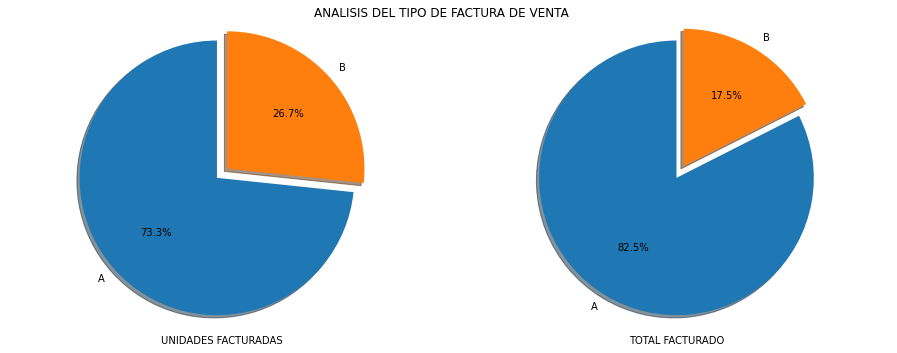

In [26]:
#Parámetros del DataFrame
fig, axs = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

fig.suptitle("ANALISIS DEL TIPO DE FACTURA DE VENTA")
fig.tight_layout()

axs[0].plot()
axs[0].pie(tipo_factura.CANTIDAD, labels=tipo_factura.TIPO, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=(0,0.1))
axs[0].axis('equal')
axs[0].set_xlabel("UNIDADES FACTURADAS")

axs[1].plot()
axs[1].pie(tipo_factura.TOTAL, labels=tipo_factura.TIPO, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=(0,0.1))
axs[1].axis('equal')
axs[1].set_xlabel("TOTAL FACTURADO")

plt.show()

+ *Gráfico de lineas para visualizar la evolución de la facturación según el tipo de comprobante emitido*

In [27]:
fig = px.line(facturas, x="FECHA", y="TOTAL", color="TIPO", title="EVOLUCIÓN DE LA FACTURACIÓN - POR TIPO DE COMPROBANTE")
fig.show()

+ *Gráfico de lineas para ver la evolución en el tiempo según la moneda empleada al facturar. De lo que se observa, nos daría pie para revisar si lo que corresponde a dolares está pesificado o no en el DF, si conviene o no mantener ese dato, porque posiblemente está alterando el conjunto de datos.*

In [28]:
fig = px.line(facturas, x="FECHA", y="TOTAL", color="MONEDA",title="EVOLUCIÓN DE LA FACTURACIÓN - POR MONEDA")
fig.show()

+ *Gráfico de Box Plot para evaluar la facturación por mes y detectar posibles valores atípicos*

In [29]:
df = facturas.query("AÑO==2018")
fig = px.box(df, x="MES", y="TOTAL", title="FACTURACIÓN POR MES - AÑO 2018", color="MES", height=450, hover_name="ORGANIZACION", boxmode="overlay")
fig.show()
df = facturas.query("AÑO==2019")
fig = px.box(df, x="MES", y="TOTAL", title="FACTURACIÓN POR MES - AÑO 2019", color="MES", height=450, hover_name="ORGANIZACION", boxmode="overlay")
fig.show()
#Si no uso boxmode="overline" las cajas quedan muy angostas
#Con al parámetro "hover_name" se puede llamar una columna de la serie, de modo tal que el valor atípico tenga algún dato adicional, en este caso el nombre del cliente

+ *Grafico de barras para visualizar la facturación total por mes*

In [30]:
#Agrupo valores del DF por mes y año
grupo_año_mes=facturas.groupby(["MES","AÑO"], as_index=False).agg(sum)
grupo_año_mes["AÑO"] = grupo_año_mes.AÑO.astype("object")
grupo_año_mes.head()
#IMPORTANTE: el tipo de dato del año aqui debe ser 'object', porque de lo contrario el gráfico me lee ese dato como número entero y me pinta de otra forma las barras

,MES,AÑO,CANTIDAD,PRECIO,TOTAL
0,April,2018,21,327511.41,392911.41
1,April,2019,87,112445.90,254850.91
2,August,2018,30,437224.66,532477.66
3,August,2019,110,94527.57,503511.56
4,December,2018,20,268954.96,414454.96


In [31]:
#Opción de barras paralelas para contrastar un año contra otro
fig = px.bar(grupo_año_mes, 
             x="MES", 
             y="TOTAL", 
             color="AÑO",
             title="FACTURACIÓN POR MES Y AÑO", 
             category_orders={"MES":["January","February","March","April","May","June","July","August","September","November","December"]})
fig.update_layout(barmode='group', xaxis_tickangle=-30)#Inclinar la leyenda del eje X en 30°
fig.show()

In [32]:
#Opción de una sola barra para contrastar un año contra otro
fig = px.bar(grupo_año_mes, 
             x="MES", 
             y="TOTAL", 
             color="AÑO",
             title="FACTURACIÓN POR MES Y AÑO", 
             category_orders={"MES":["January","February","March","April","May","June","July","August","September","November","December"]})
fig.update_layout(xaxis_tickangle=-30)
fig.show()

+ *Gráfico de barras para visualizar la facturación por producto*

In [33]:
alt.Chart(facturas).mark_bar().encode(
  x="TOTAL",
  y=alt.Y("PRODUCTO"),
  color="PRODUCTO",).interactive().properties(title="IMPORTE TOTAL FACTURADO POR PRODUCTO")

alt.Chart(...)

In [34]:
alt.Chart(facturas).mark_bar().encode(
  x="CANTIDAD",
  y=alt.Y("PRODUCTO"),
  color="PRODUCTO",).interactive().properties(title="UNIDADES FACTURADAS POR PRODUCTO")

alt.Chart(...)